In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Problema da risolvere: 3D xor quadrant
# Vogliamo far sì che gli 8 quadranti di uno spazio cartesiano siano appartenenti a classi diverse e che nessun quadrante
# adiacente sia della stessa classe (scacchiera 3d). Usiamo le LSTM perchè noi campioniamo i punti su una serie temporale e sperimentiamo
# L'idea è quella di effettuare la classificazione valutando il segno di tre punti consecutivi nella "serie temporale".
# Inizialmente lo faremo con gli ultimi tre valori, per comprendere l'apprendimento. Dopo di che lo faremo coi primi tre
T = 10 # Partiamo da 10 e poi allunghiamo
D = 1
x = []
y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    return 0

for t in range(5000):
    point = np.random.randn(T)
    x.append(point)
    #label = get_label(point, -1, -2, -3)
    # Per testare invece la long term dependency
    label = get_label(point, 0, 1, 2)
    y.append(label)

x = np.array(x)
y = np.array(y)
N = len(x)

x.shape, y.shape

((5000, 10), (5000,))

In [25]:
# Test con modello lineare
# RNN "Semplice"
i = Input(shape=(T, ))
out = Dense(1, activation="sigmoid")(i)
model = Model(i, out)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
r = model.fit(
    x, y, validation_split=0.5, epochs=100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5718 - loss: 0.7439 - val_accuracy: 0.6860 - val_loss: 0.6267
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: 0.6078 - val_accuracy: 0.7236 - val_loss: 0.6168
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7277 - loss: 0.6028 - val_accuracy: 0.7268 - val_loss: 0.6168
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.6075 - val_accuracy: 0.7268 - val_loss: 0.6150
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7198 - loss: 0.6120 - val_accuracy: 0.7264 - val_loss: 0.6156
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - loss: 0.6297 - val_accuracy: 0.7256 - val_loss: 0.6167
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7172 - loss: 0.6145 - val_accuracy: 0.7252 - val_loss: 0.6173
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.6023 - val_accuracy: 0.7296 - v

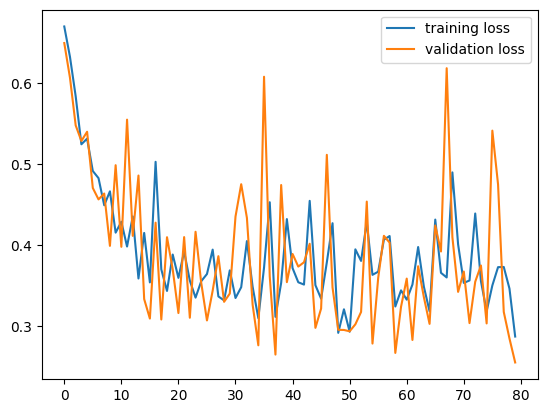

In [33]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

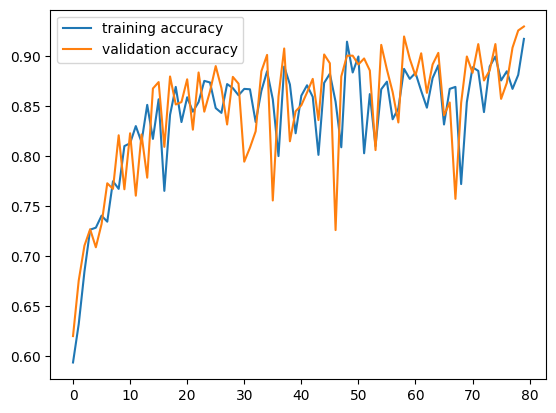

In [34]:
plt.plot(r.history["accuracy"], label="training accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend();

In [29]:
# RNN "Semplice"
i = Input(shape=(T, D))
out = SimpleRNN(5, activation="tanh")(i)
out = Dense(1, activation="sigmoid")(out)
model = Model(i, out)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=80)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5722 - loss: 0.6907 - val_accuracy: 0.6204 - val_loss: 0.6494
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.6404 - val_accuracy: 0.6760 - val_loss: 0.6065
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5900 - val_accuracy: 0.7108 - val_loss: 0.5477
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7378 - loss: 0.5189 - val_accuracy: 0.7272 - val_loss: 0.5284
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.5136 - val_accuracy: 0.7092 - val_loss: 0.5398
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.5274 - val_accuracy: 0.7324 - val_loss: 0.4704
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.4869 - val_accuracy: 0.7732 - val_loss: 0.4563
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.4387 - val_accuracy: 0.7676 - val_loss:

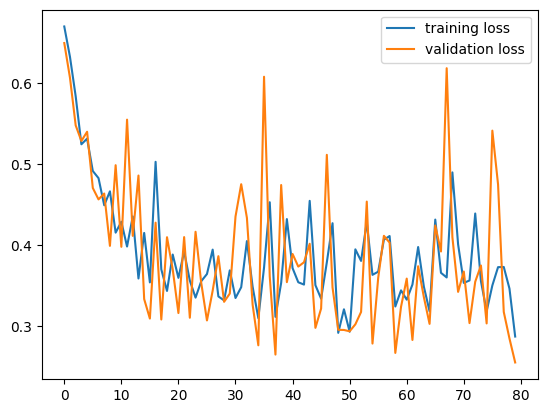

In [31]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

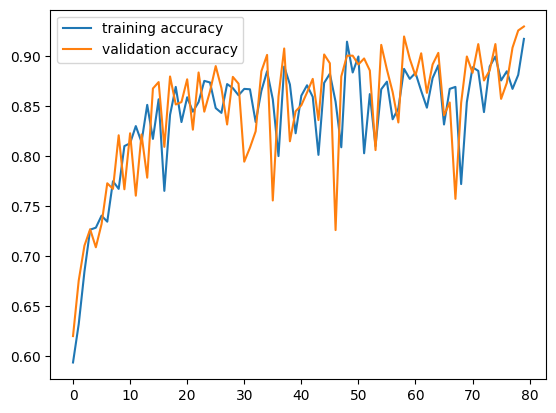

In [32]:
plt.plot(r.history["accuracy"], label="training accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend();

In [35]:
# LSTM
i = Input(shape=(T, D))
out = LSTM(10, activation="tanh")(i)
out = Dense(1, activation="sigmoid")(out)
model = Model(i, out)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5369 - loss: 0.6838 - val_accuracy: 0.5652 - val_loss: 0.6714
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5952 - loss: 0.6588 - val_accuracy: 0.5860 - val_loss: 0.6561
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5919 - loss: 0.6573 - val_accuracy: 0.5948 - val_loss: 0.6497
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.6557 - val_accuracy: 0.6076 - val_loss: 0.6441
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6265 - loss: 0.6279 - val_accuracy: 0.6228 - val_loss: 0.6299
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6540 - loss: 0.6125 - val_accuracy: 0.6436 - val_loss: 0.6111
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 0.5891 - val_accuracy: 0.6220 - val_loss: 0.6164
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6356 - loss: 0.5943 - val_accuracy: 0.6724 - v

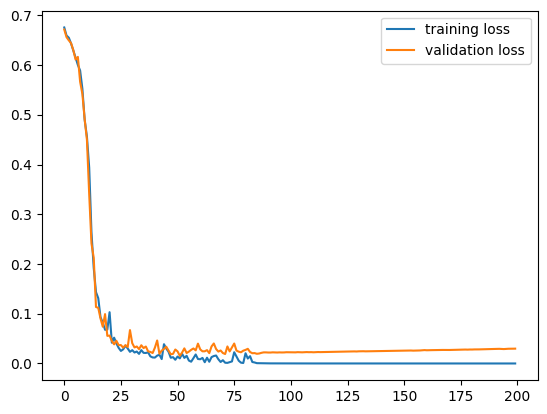

In [37]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

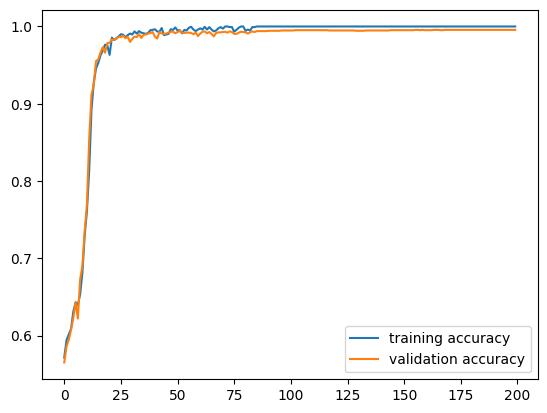

In [38]:
plt.plot(r.history["accuracy"], label="training accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend();

In [39]:
# LSTM con sequences
from tensorflow.keras.layers import GlobalMaxPooling1D
i = Input(shape=(T, D))
out = LSTM(10, activation="tanh", return_sequences=True)(i)
out = GlobalMaxPooling1D()(out)
out = Dense(1, activation="sigmoid")(out)
model = Model(i, out)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 10)              │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 10)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=200)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5382 - loss: 0.6788 - val_accuracy: 0.5896 - val_loss: 0.6618
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6192 - loss: 0.6472 - val_accuracy: 0.6312 - val_loss: 0.6399
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6634 - loss: 0.6153 - val_accuracy: 0.6704 - val_loss: 0.6257
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7103 - loss: 0.5808 - val_accuracy: 0.7116 - val_loss: 0.5765
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7395 - loss: 0.5425 - val_accuracy: 0.7248 - val_loss: 0.5540
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7795 - loss: 0.4894 - val_accuracy: 0.7888 - val_loss: 0.4677
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7964 - loss: 0.4540 - val_accuracy: 0.8540 - val_loss: 0.3742
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.3445 - val_accuracy: 0.9144 - v

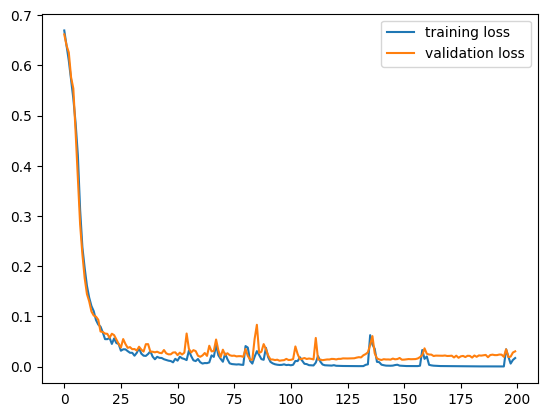

In [41]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

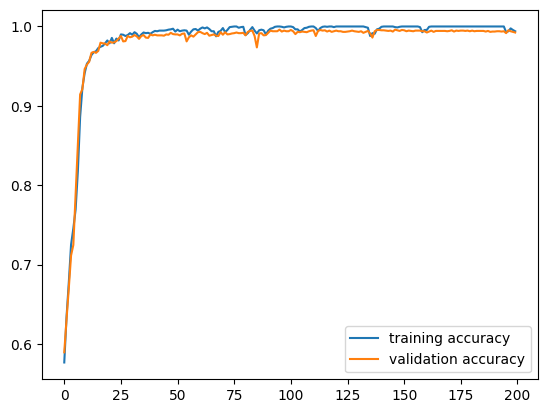

In [42]:
plt.plot(r.history["accuracy"], label="training accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend();